# Big Mart Stores Sales Prediction

## Problem Statement:

#### Data: Big Mart Data

- Nowadays, shopping malls and Big Marts keep track of individual item sales data in order to forecast future client demand and adjust inventory management. 
- In a data warehouse, these data stores hold a significant amount of consumer information and particular item details. 
- By mining the data store from the data warehouse, more anomalies and common patterns can be discovered.

#### Solution:
 - To build a solution that should able to predict the sales of the different stores of Big Mart
 - Using classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing.
 - Try out different machine learning algorithms that’s best fit for the above case.

#### Details about Data:
- We have train (8523) and test (5681) data set, train data set has both input and output variable(s). 
- We need to predict the sales for test data set.

    - Item_Identifier: Unique product ID
    - Item_Weight: Weight of product
    - Item_Fat_Content: Whether the product is low fat or not
    - Item_Visibility: The % of total display area of all products in a store allocated to the particular product
    - Item_Type: The category to which the product belongs
    - Item_MRP: Maximum Retail Price (list price) of the product
    - Outlet_Identifier: Unique store ID
    - Outlet_Establishment_Year: The year in which store was established
    - Outlet_Size: The size of the store in terms of ground area covered
    - Outlet_Location_Type: The type of city in which the store is located
    - Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
    - Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Read Data

In [4]:
df = pd.read_csv('/config/workspace/notebooks/Train.csv')

#### Check top 5 rows

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### check number of rows and columns

In [14]:
df.shape

(8523, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [42]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("Number of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


#### Checking Missing Values

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

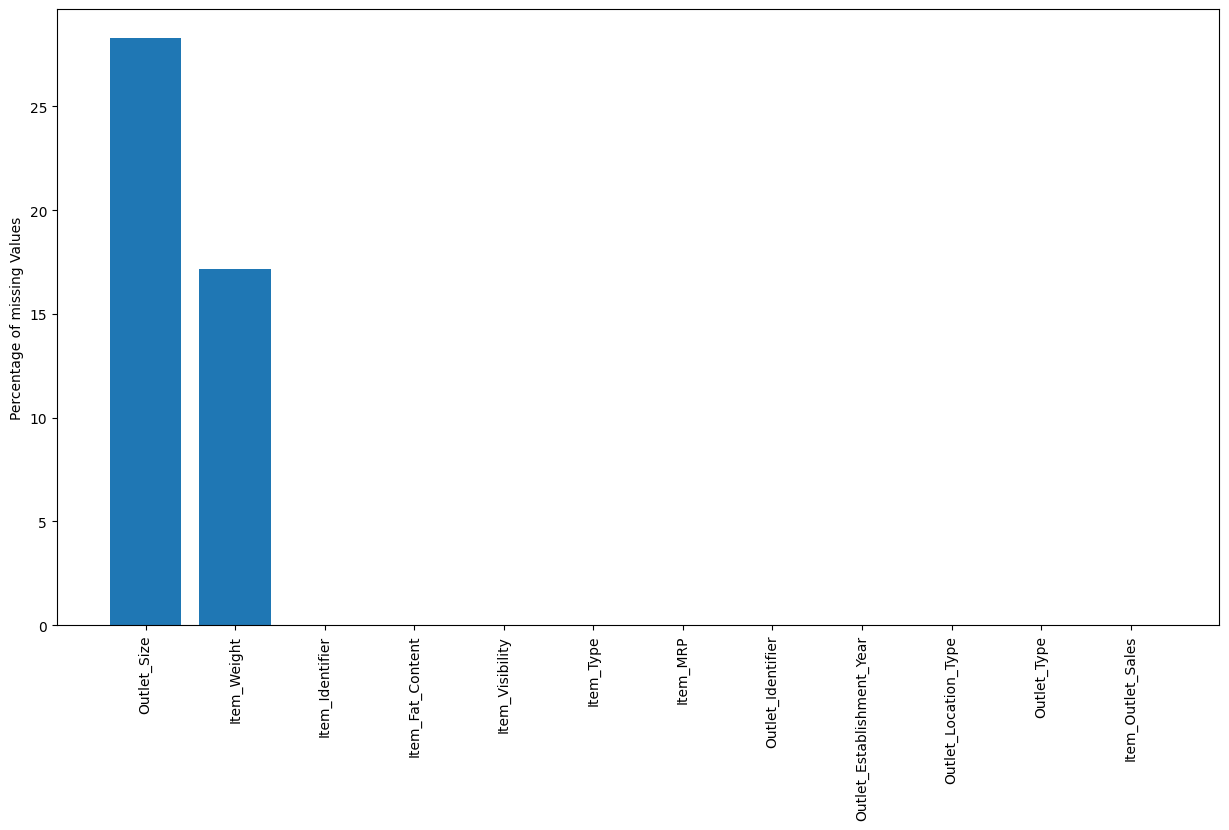

In [22]:
fig, ax =plt.subplots(figsize=(15,8))
missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)
ax.bar(missing.index, missing.values.T[0])
plt.xticks(rotation=90)
plt.ylabel('Percentage of missing Values')
plt.show()

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### define numerical and categorical features

In [16]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print numerical and categorical features
print(f'we have {len(numerical_features)} numerical_features: {numerical_features}')
print(f'we have {len(categorical_features)} categorical_features: {categorical_features}')

we have 5 numerical_features: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
we have 7 categorical_features: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


### Plot distribution of independent numeric features

#### Item_Weight

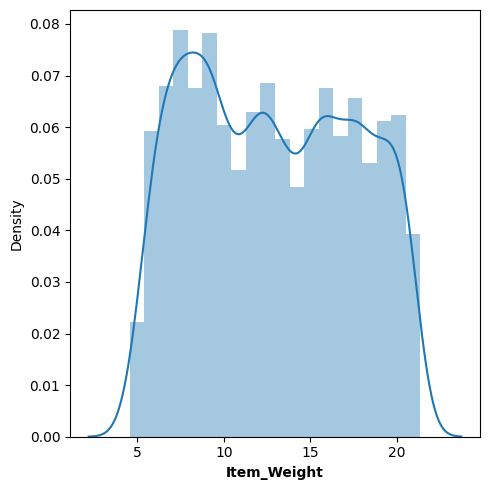

In [129]:
plt.figure(figsize=(5,5))
sns.distplot(df['Item_Weight'],kde=True)
plt.xlabel('Item_Weight',weight='bold')
plt.tight_layout()

**Insights**

- From the above graph we can observe that we have the item weight from 5 Kg to 20 Kg
- We have maximum values around 7 to 9 Kg
- In this 8523 products the average weight is about 12.8 Kg

#### Item_Visibility

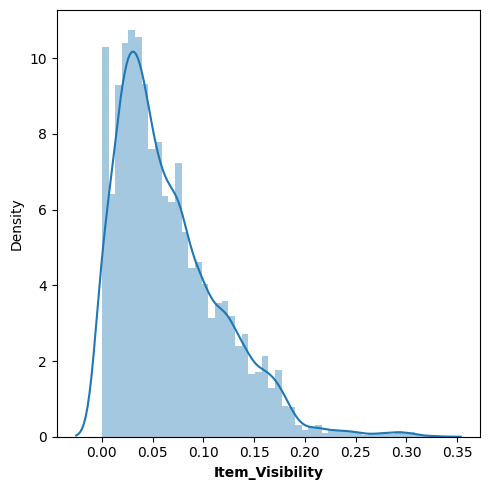

In [130]:
plt.figure(figsize=(5,5))
sns.distplot(df['Item_Visibility'],kde=True)
plt.xlabel('Item_Visibility',weight='bold')
plt.tight_layout()

**Insights**

- From the above graph we can observe that Item_Visibility is positively skewed distribution, a type of distribution in which the tail of the distribution is longer on the positive side, and the majority of the values are clustered on the left side of the distribution
- Positively skewed distributions are more likely to have outliers on the high end of the distribution

#### Item_MRP

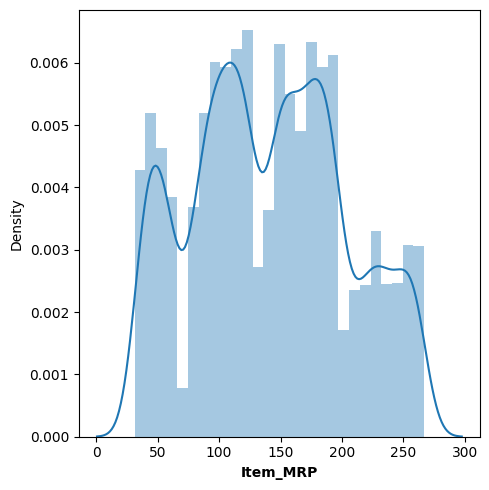

In [132]:
plt.figure(figsize=(5,5))
sns.distplot(df['Item_MRP'],kde=True)
plt.xlabel('Item_MRP',weight='bold')
plt.tight_layout()

**Insights**

- From the above graph we can observe that Item_MRP has muli modal distribution, a type of distribution that has more than one peak, indicating that the data is not concentrated around a single value, but rather multiple values.
- Most of the items have MRP between 100 to 180

### Plot Count plot of independent categorical features

#### Item_Fat_Content

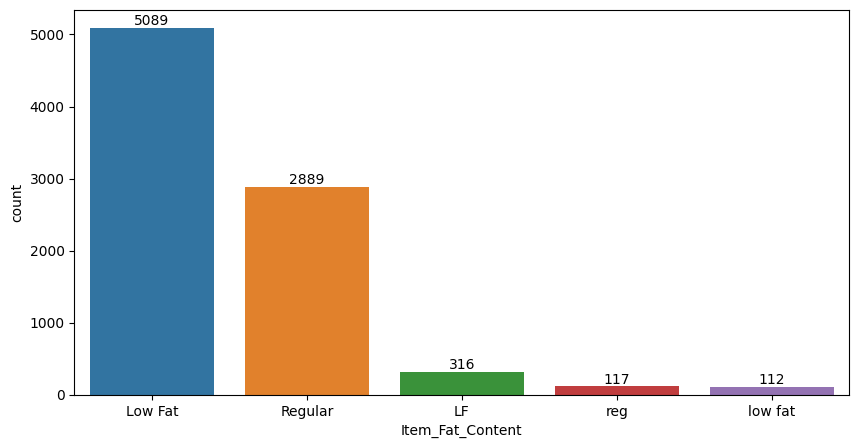

In [113]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Item_Fat_Content', data=df, order=df['Item_Fat_Content'].value_counts(ascending=False).index)
ax.bar_label(container=ax.containers[0], labels=df['Item_Fat_Content'].value_counts(ascending=False))
plt.show()

### Replace values for Item_Fat_Content

In [136]:
df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}, inplace=True)

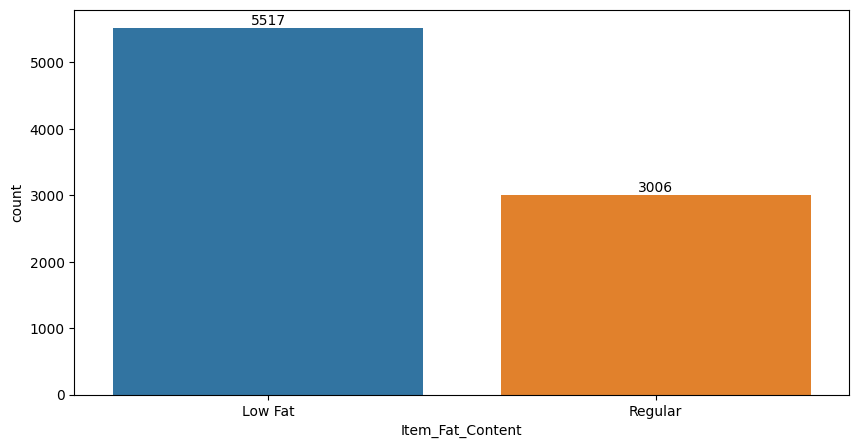

In [137]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Item_Fat_Content', data=df, order=df['Item_Fat_Content'].value_counts(ascending=False).index)
ax.bar_label(container=ax.containers[0], labels=df['Item_Fat_Content'].value_counts(ascending=False))
plt.show()

**Insights**
- The variable Item_Fat_Content has two categories, "Low Fat" and "Regular". 
- The dataset has 5517 observations with "Low Fat" and 3006 observations with "Regular" fat content. 
- This suggests that the majority of the items in the dataset have "Low Fat" content.

#### Item_Type

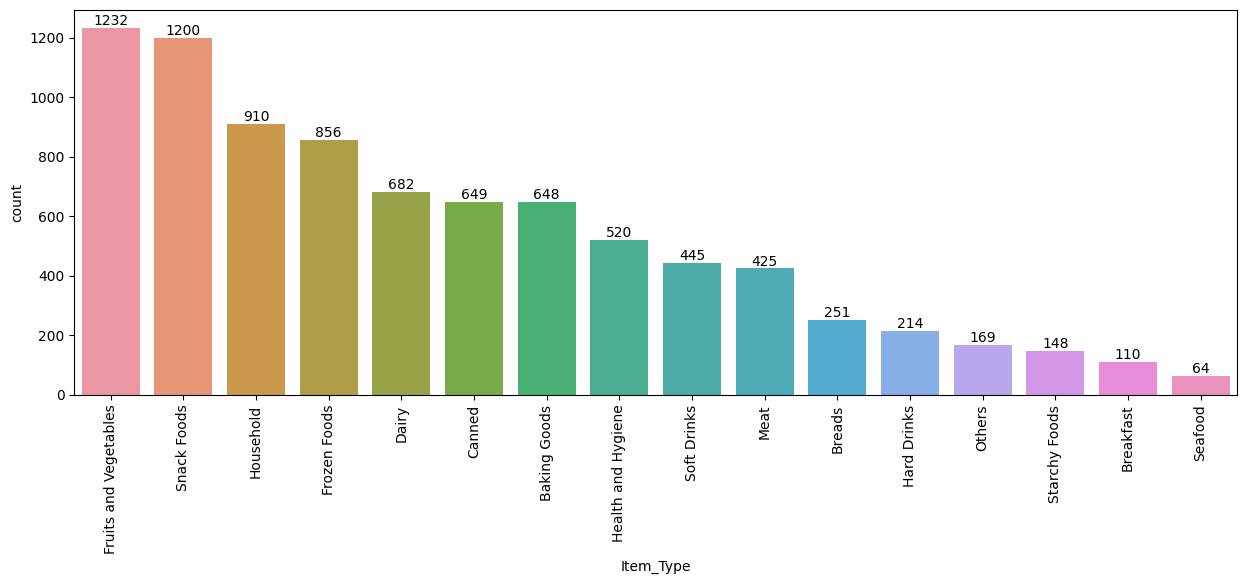

In [111]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x='Item_Type', data=df, order=df['Item_Type'].value_counts(ascending=False).index)
ax.bar_label(container=ax.containers[0], labels=df['Item_Type'].value_counts(ascending=False))
plt.xticks(rotation=90)
plt.show()

**Insights**
- The most commonly sold item types are Fruits and Vegetables, Snack Foods, and Household items.
- Health and Hygiene products, Soft Drinks, and Meat are sold relatively less frequently.
- Breads, Hard Drinks, Others, Starchy Foods, Breakfast, and Seafood are the least commonly sold item types.

#### Outlet_Identifier

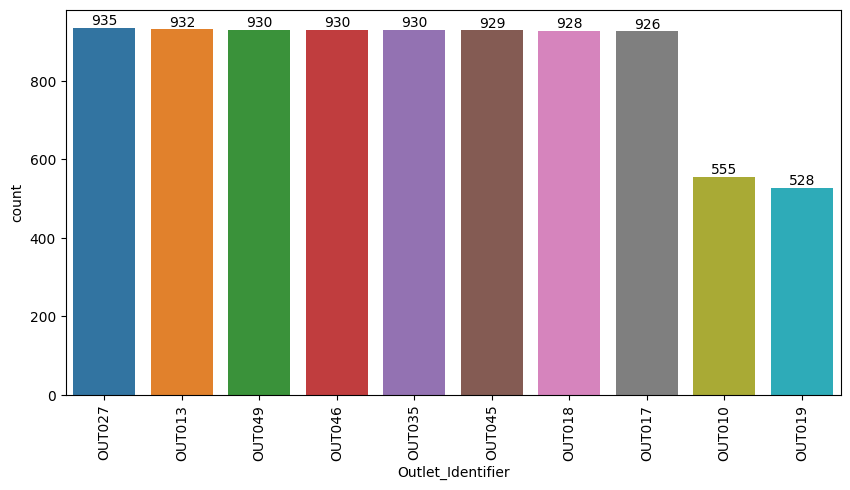

In [114]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Outlet_Identifier', data=df, order=df['Outlet_Identifier'].value_counts(ascending=False).index)
ax.bar_label(container=ax.containers[0], labels=df['Outlet_Identifier'].value_counts(ascending=False))
plt.xticks(rotation=90)
plt.show()

**Insights**
- The Outlet_Identifier variable contains categorical data, which represents the unique identification code for each outlet. 
- The data shows that there are 10 distinct outlet identifiers in the dataset
- The most frequent identifier is "OUT027" with a count of 935, followed by "OUT013" and "OUT049" with counts of 932 and 930, respectively. 
- Five other identifiers have the same count of 930, and one identifier has a count of 929. 
- The least frequent identifiers are "OUT010" and "OUT019" with counts of 555 and 528, respectively.

#### Outlet_Size

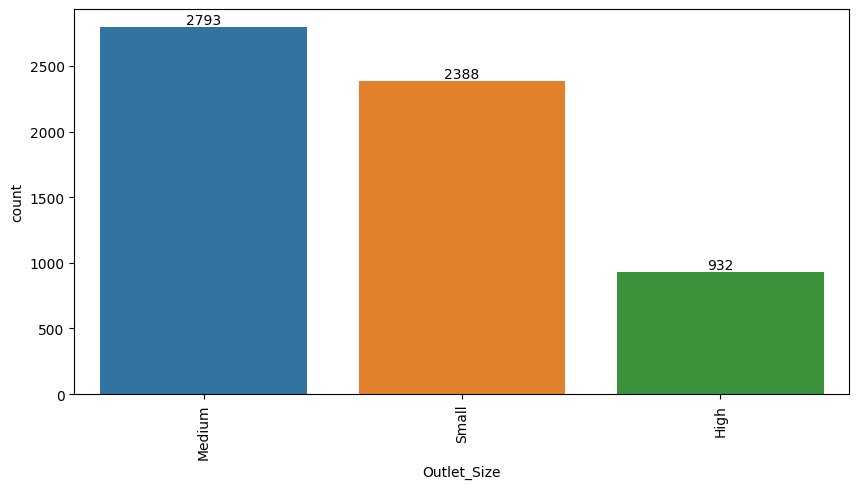

In [115]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Outlet_Size', data=df, order=df['Outlet_Size'].value_counts(ascending=False).index)
ax.bar_label(container=ax.containers[0], labels=df['Outlet_Size'].value_counts(ascending=False))
plt.xticks(rotation=90)
plt.show()

**Insights**
- The Outlet_Size column has three unique values: Medium, Small, and High. 
- The majority of outlets have a Medium size, with a count of 2793. Small outlets come in second, with a count of 2388, and High outlets have the lowest count, with only 932 outlets. 
- These insights suggest that most outlets in the dataset are of a medium or small size, while high-sized outlets are less common.

#### Outlet_Establishment_Year

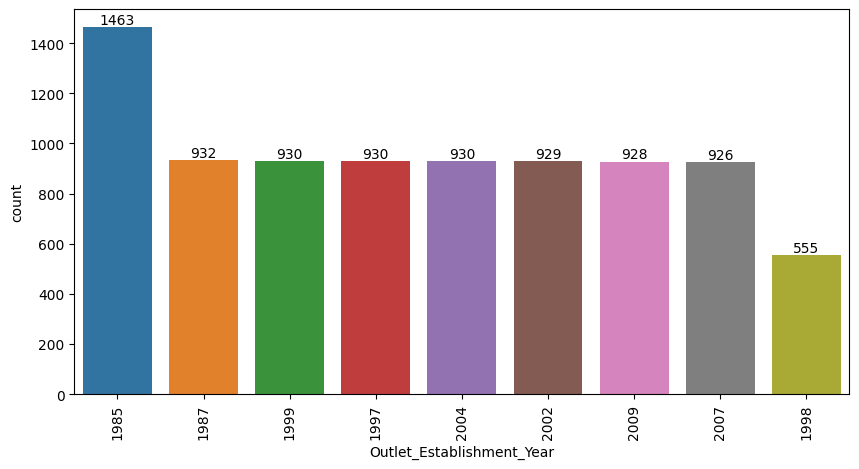

In [117]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Outlet_Establishment_Year', data=df, order=df['Outlet_Establishment_Year'].value_counts(ascending=False).index)
ax.bar_label(container=ax.containers[0], labels=df['Outlet_Establishment_Year'].value_counts(ascending=False))
plt.xticks(rotation=90)
plt.show()

**Insights**

- The Outlet_Establishment_Year column contains the year in which each outlet was established. 
- The data shows that most of the outlets were established between 1985 and 2009, with the highest number of outlets 1463 established in 1985. 
- The number of outlets established in each year is relatively consistent, with the exception of 1998, which has significantly fewer outlets than the other years.

#### Outlet_Location_Type

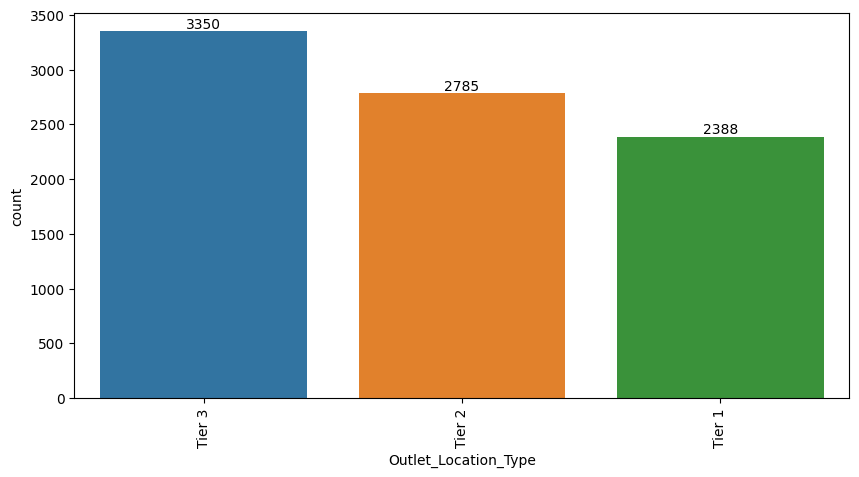

In [120]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Outlet_Location_Type', data=df, order=df['Outlet_Location_Type'].value_counts(ascending=False).index)
ax.bar_label(container=ax.containers[0], labels=df['Outlet_Location_Type'].value_counts(ascending=False))
plt.xticks(rotation=90)
plt.show()

**Insights**

- The Outlet_Location_Type feature has three categories: Tier 1, Tier 2, and Tier 3. 
- The count of outlets in each tier is 2388, 2785, and 3350, respectively. 
- This suggests that Tier 3 has the highest number of outlets, followed by Tier 2, and Tier 1 has the lowest number of outlets. 

#### Outlet_Type

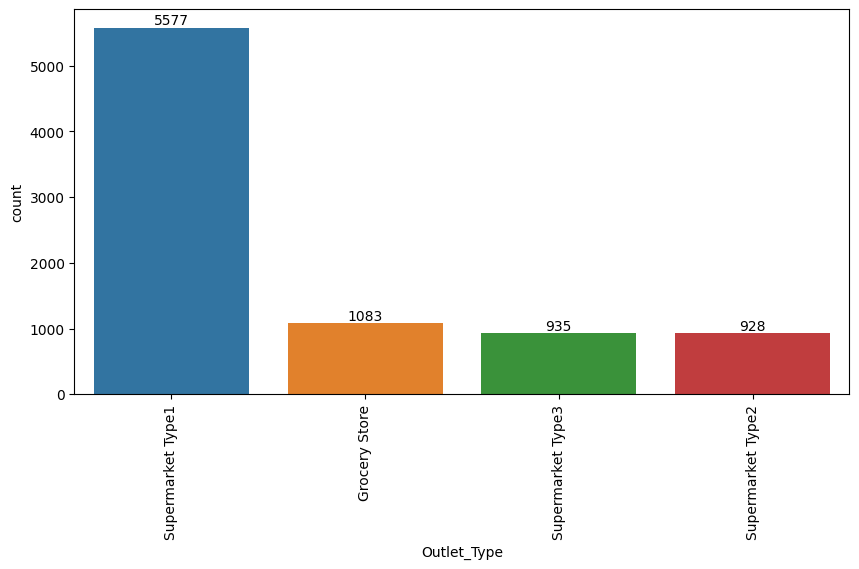

In [122]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Outlet_Type', data=df, order=df['Outlet_Type'].value_counts(ascending=False).index)
ax.bar_label(container=ax.containers[0], labels=df['Outlet_Type'].value_counts(ascending=False))
plt.xticks(rotation=90)
plt.show()

**Insights**

- The Outlet_Type column has four unique values: Supermarket Type1, Supermarket Type2, Supermarket Type3, and Grocery Store. 
- The most common type is Supermarket Type1, with 5577 occurrences, followed by Grocery Store with 1083 occurrences.
- Supermarket Type3 and Supermarket Type2 have similar occurrences, with 935 and 928 respectively. 

### Plot distribution of the target variable

#### Item_Outlet_Sales

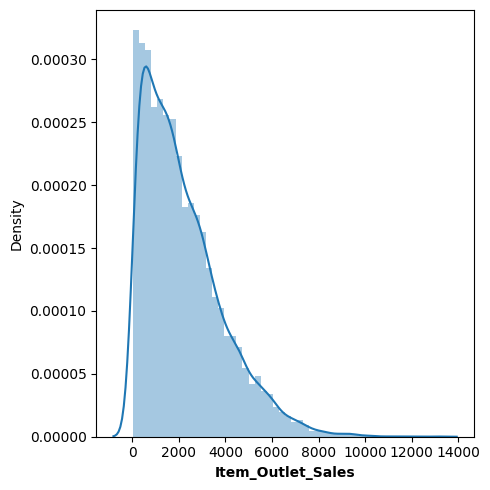

In [135]:
plt.figure(figsize=(5,5))
sns.distplot(df['Item_Outlet_Sales'],kde=True)
plt.xlabel('Item_Outlet_Sales',weight='bold')
plt.tight_layout()

**Insights**

- From the above graph we can observe that Item_Outlet_Sales is positively skewed distribution, a type of distribution in which the tail of the distribution is longer on the positive side, and the majority of the values are clustered on the left side of the distribution
- Positively skewed distributions are more likely to have outliers on the high end of the distribution

In [89]:
print("To check: Unique count of non-numeric data")
cat_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size','Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type']
print(df[cat_features].nunique())

To check: Unique count of non-numeric data
Item_Fat_Content              5
Item_Type                    16
Outlet_Identifier            10
Outlet_Size                   3
Outlet_Establishment_Year     9
Outlet_Location_Type          3
Outlet_Type                   4
dtype: int64
